# 2016美国大选
[项目地址](https://www.kaggle.com/fivethirtyeight/2016-election-polls)

In [3]:
# 引入必要的库
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 数据文件地址
filename = './presidential_polls.csv'

* 列名预处理

In [4]:
# 读取列名，即第一行数据
with open(filename, 'r') as f:
    col_names_str = f.readline()[:-1] # [:-1]表示不读取末尾的换行符'\n'

# 将字符串拆分，并组成列表
col_name_lst = col_names_str.split(',')

# 使用的列名
use_col_name_lst = ['enddate', 'rawpoll_clinton', 'rawpoll_trump','adjpoll_clinton', 'adjpoll_trump']

# 获取相应列名的索引号
use_col_index_lst = [col_name_lst.index(use_col_name) for use_col_name in use_col_name_lst]


* 数据读取

In [5]:
data_array = np.loadtxt(filename,      # 文件名
                        delimiter=',', # 分隔符
                        skiprows=1,    # 跳过第一行，即跳过列名
                        dtype=str,     # 数据类型
                        usecols=use_col_index_lst) # 指定读取的列索引号

# print data_array, data_array.shape
print (data_array, data_array.shape)

[['10/31/2016' '37.69' '35.07' '42.6414' '40.86509']
 ['10/30/2016' '45' '46' '43.29659' '44.72984']
 ['10/30/2016' '48' '42' '46.29779' '40.72604']
 ...
 ['9/22/2016' '46.54' '40.04' '45.9713' '39.97518']
 ['6/21/2016' '43' '43' '45.2939' '46.66175']
 ['8/18/2016' '32.54' '43.61' '31.62721' '44.65947']] (10236, 5)


* 数据处理

In [6]:
# 处理日期格式数据
enddate_idx = use_col_name_lst.index('enddate')
enddate_lst = data_array[:,enddate_idx].tolist()

# 将日期字符串格式统一，即'yy/dd/mm'
enddate_lst = [enddate.replace('-', '/') for enddate in enddate_lst]

# 将日期字符串转换成日期
date_lst = [datetime.datetime.strptime(enddate, '%m/%d/%Y') for enddate in enddate_lst]

# 构造年份-月份列表
month_lst = ['%d-%02d' %(date_obj.year, date_obj.month) for date_obj in date_lst]

# print month_lst
print (month_lst)

['2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10', '2016-10'

In [8]:
month_array = np.array(month_lst)
months = np.unique(month_array)
# print months
print (months)

['2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10']


* 数据分析

In [9]:
# 统计民意投票数
# cliton
# 原始数据 rawpoll
rawpoll_clinton_idx = use_col_name_lst.index('rawpoll_clinton')
rawpoll_clinton_data = data_array[:, rawpoll_clinton_idx]

# 调整后的数据 adhpool
adjpoll_clinton_idx = use_col_name_lst.index('adjpoll_clinton')
adjpoll_clinton_data = data_array[:, adjpoll_clinton_idx]

# trump
# 原始数据 rawpoll
rawpoll_trump_idx = use_col_name_lst.index('rawpoll_trump')
rawpoll_trump_data = data_array[:, rawpoll_trump_idx]

# 调整后的数据 adjpoll
adjpoll_trump_idx = use_col_name_lst.index('adjpoll_trump')
adjpoll_trump_data = data_array[:, adjpoll_trump_idx]

# 结果保存
results = []

def is_convert_float(s):
    """
         判断一个字符串能否转换为float
    """
    try:
        float(s)
    except:
        return False
    
    return True

def get_sum(str_array):
    """
        返回字符串数组中数字的总和
    """
    # 去掉不能转换成数字的数据
    cleaned_data = list(filter(is_convert_float, str_array))
    
    # 转换数据类型
    float_array = np.array(cleaned_data, np.float)
    
    return np.sum(float_array)
    

for month in months:   
    # clinton
    # 原始数据 rawpoll
    rawpoll_clinton_month_data = rawpoll_clinton_data[month_array == month]  
    # 统计当月的总票数
    rawpoll_clinton_month_sum = get_sum(rawpoll_clinton_month_data)
    
    # 调整数据 adjpoll
    adjpoll_clinton_month_data = adjpoll_clinton_data[month_array == month]  
    # 统计当月的总票数
    adjpoll_clinton_month_sum = get_sum(adjpoll_clinton_month_data)
    
    
    # trump
    # 原始数据 rawpoll
    rawpoll_trump_month_data = rawpoll_trump_data[month_array == month]
    # 统计当月的总票数
    rawpoll_trump_month_sum = get_sum(rawpoll_trump_month_data)
    
    # 调整数据 adjpoll
    adjpoll_trump_month_data = adjpoll_trump_data[month_array == month]
    # 统计当月的总票数
    adjpoll_trump_month_sum = get_sum(adjpoll_trump_month_data)
    
    results.append((month, rawpoll_clinton_month_sum, adjpoll_clinton_month_sum, rawpoll_trump_month_sum, adjpoll_trump_month_sum))
    
# print results
print (results)


months, raw_cliton_sum, adj_cliton_sum, raw_trump_sum, adj_trump_sum = zip(*results)

[('2015-11', 1920.0, 1916.6980600000002, 1948.1999999999998, 1937.3290100000002), ('2015-12', 4816.8, 4637.25688, 4164.3, 4088.9218999999994), ('2016-01', 6861.60007685, 6585.16702, 6267.0, 6253.24935), ('2016-02', 8271.6002536, 7946.228610000001, 7528.200000000001, 7672.3398), ('2016-03', 11656.202546, 11156.098240000001, 9626.7, 9991.59358), ('2016-04', 11911.8039268, 11579.42678, 9396.3, 9884.156190000002), ('2016-05', 12155.7247957, 12242.27538, 11456.1061505, 12069.761290000002), ('2016-06', 20721.0537163, 19771.33576, 16551.9, 18154.90623), ('2016-07', 22007.0138546, 23233.111679999998, 21426.989999999998, 22757.07327), ('2016-08', 63619.396242, 67909.28210000001, 59529.0, 66428.29714000001), ('2016-09', 96476.6678689, 102445.45295, 98418.9955574, 106065.00385000001), ('2016-10', 162766.8889154, 165319.59355, 155392.975543, 164990.78638900002)]


* 可视化分析结果

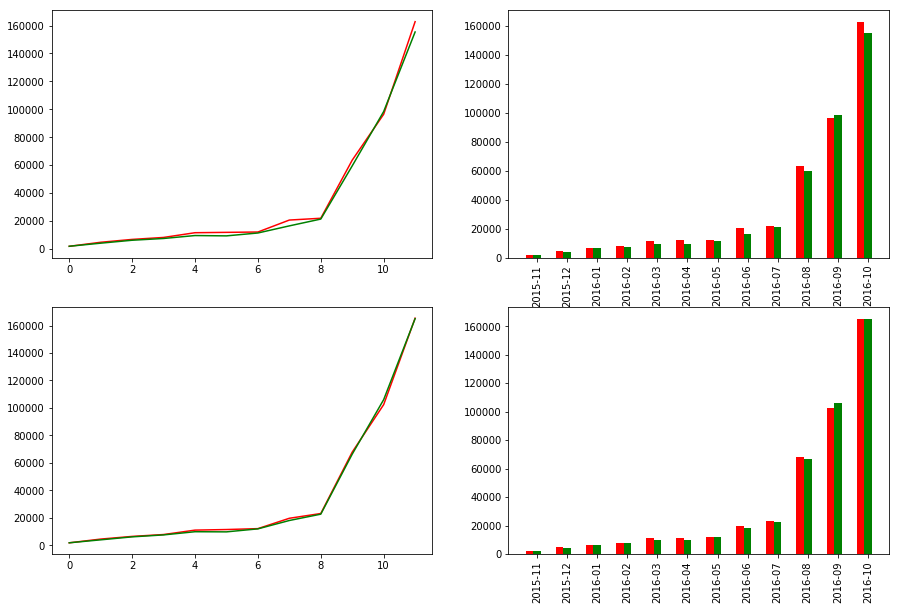

In [10]:
fig, subplot_arr = plt.subplots(2,2, figsize=(15,10))

# 原始数据趋势展示
subplot_arr[0,0].plot(raw_cliton_sum, color='r')
subplot_arr[0,0].plot(raw_trump_sum, color='g')

width = 0.25
x = np.arange(len(months))
subplot_arr[0,1].bar(x, raw_cliton_sum, width, color='r')
subplot_arr[0,1].bar(x + width, raw_trump_sum, width, color='g')
subplot_arr[0,1].set_xticks(x + width)
subplot_arr[0,1].set_xticklabels(months, rotation='vertical')

# 调整数据趋势展示
subplot_arr[1,0].plot(adj_cliton_sum, color='r')
subplot_arr[1,0].plot(adj_trump_sum, color='g')

width = 0.25
x = np.arange(len(months))
subplot_arr[1,1].bar(x, adj_cliton_sum, width, color='r')
subplot_arr[1,1].bar(x + width, adj_trump_sum, width, color='g')
subplot_arr[1,1].set_xticks(x + width)
subplot_arr[1,1].set_xticklabels(months, rotation='vertical')

plt.subplots_adjust(wspace=0.2)

plt.show()